In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# loading the data
data = pd.read_csv("/content/Flight_Booking.csv")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# data analysis
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [4]:
# data cleaning
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

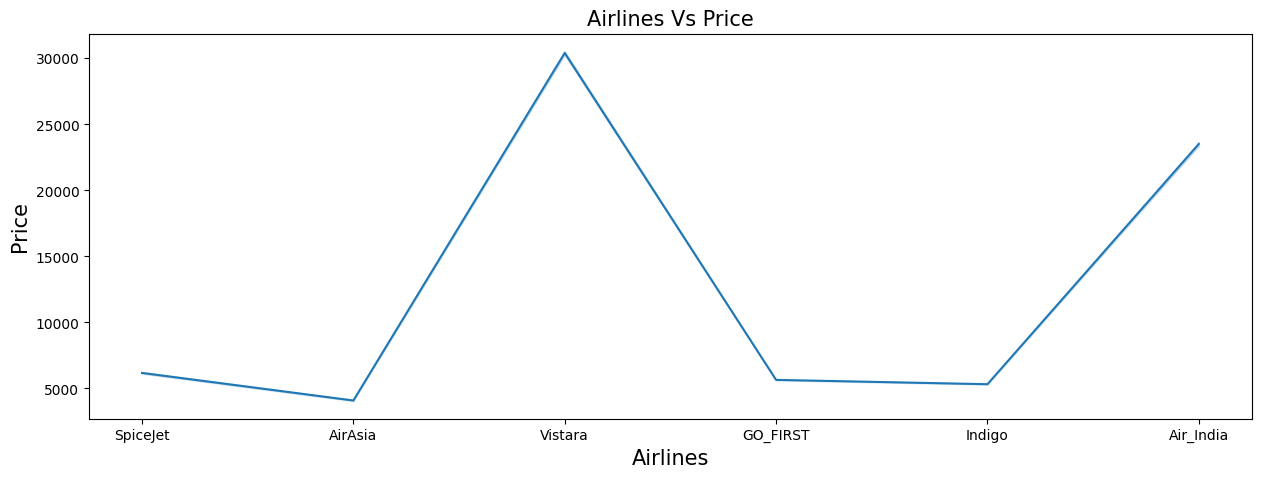

there is a variation in price with different airlines


In [5]:
# data visualization
plt.figure(figsize=(15,5))
sns.lineplot(x= data['airline'],y= data['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
print('there is a variation in price with different airlines')

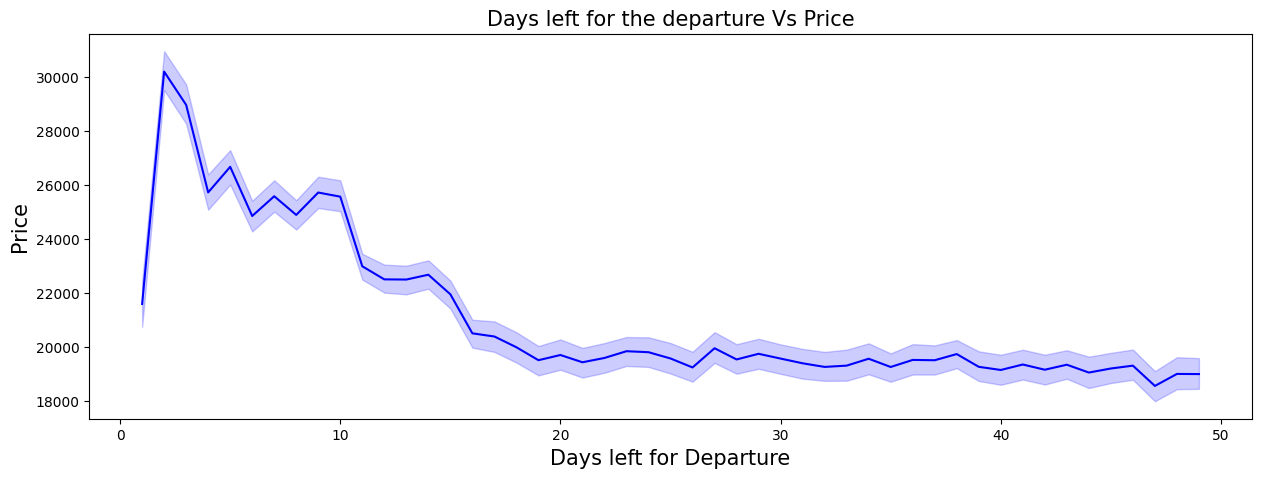

The price increase as the days left for departure decrease


In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['days_left'],y=data['price'],color='blue')
plt.title('Days left for the departure Vs Price', fontsize=15)
plt.xlabel('Days left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
print('The price increase as the days left for departure decrease')

Price range of all the flight


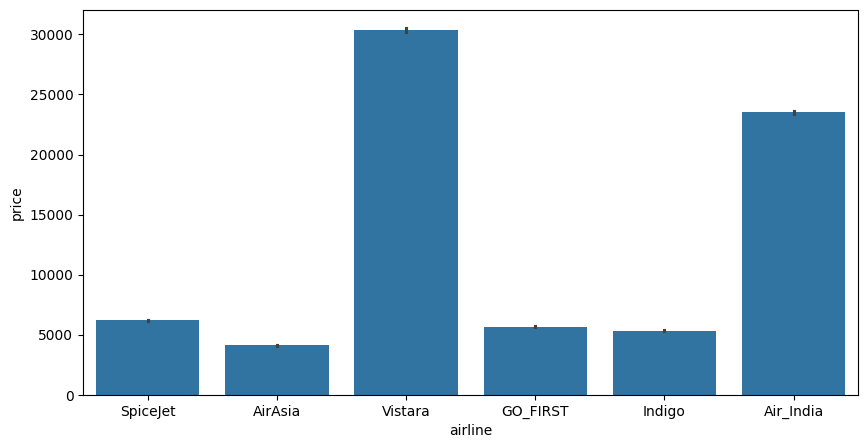

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['airline'],y=data['price'])
print('Price range of all the flight')

Range of price of all flights of economy and business class


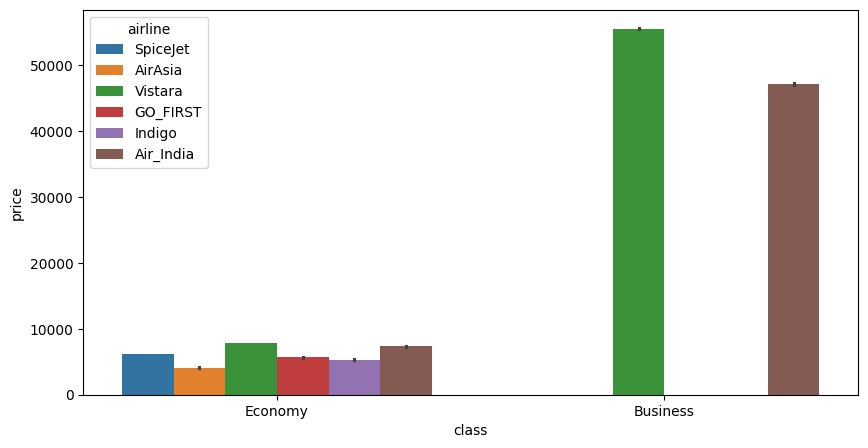

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['class'],y=data['price'],hue=data['airline'])
print('Range of price of all flights of economy and business class')

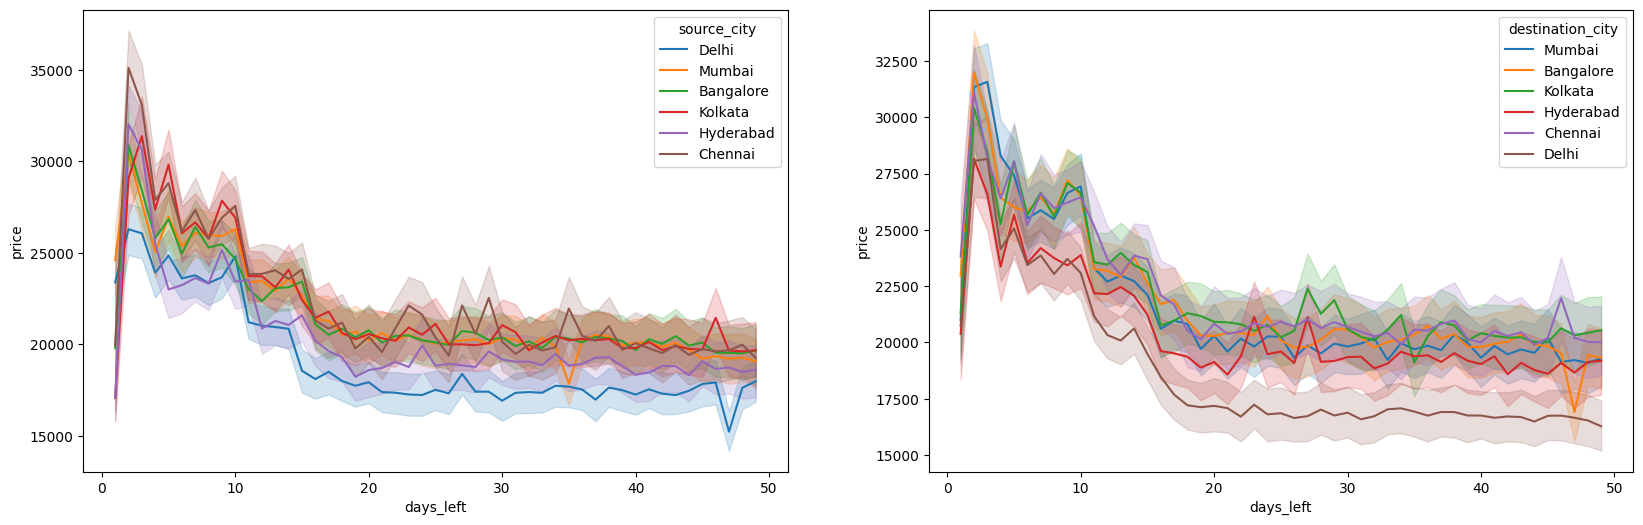

range of price of flights with source and destination city according to the days left


In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=data,x='days_left',y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=data,x='days_left',y='price',hue='destination_city',ax=ax[1])
plt.show()
print('range of price of flights with source and destination city according to the days left')

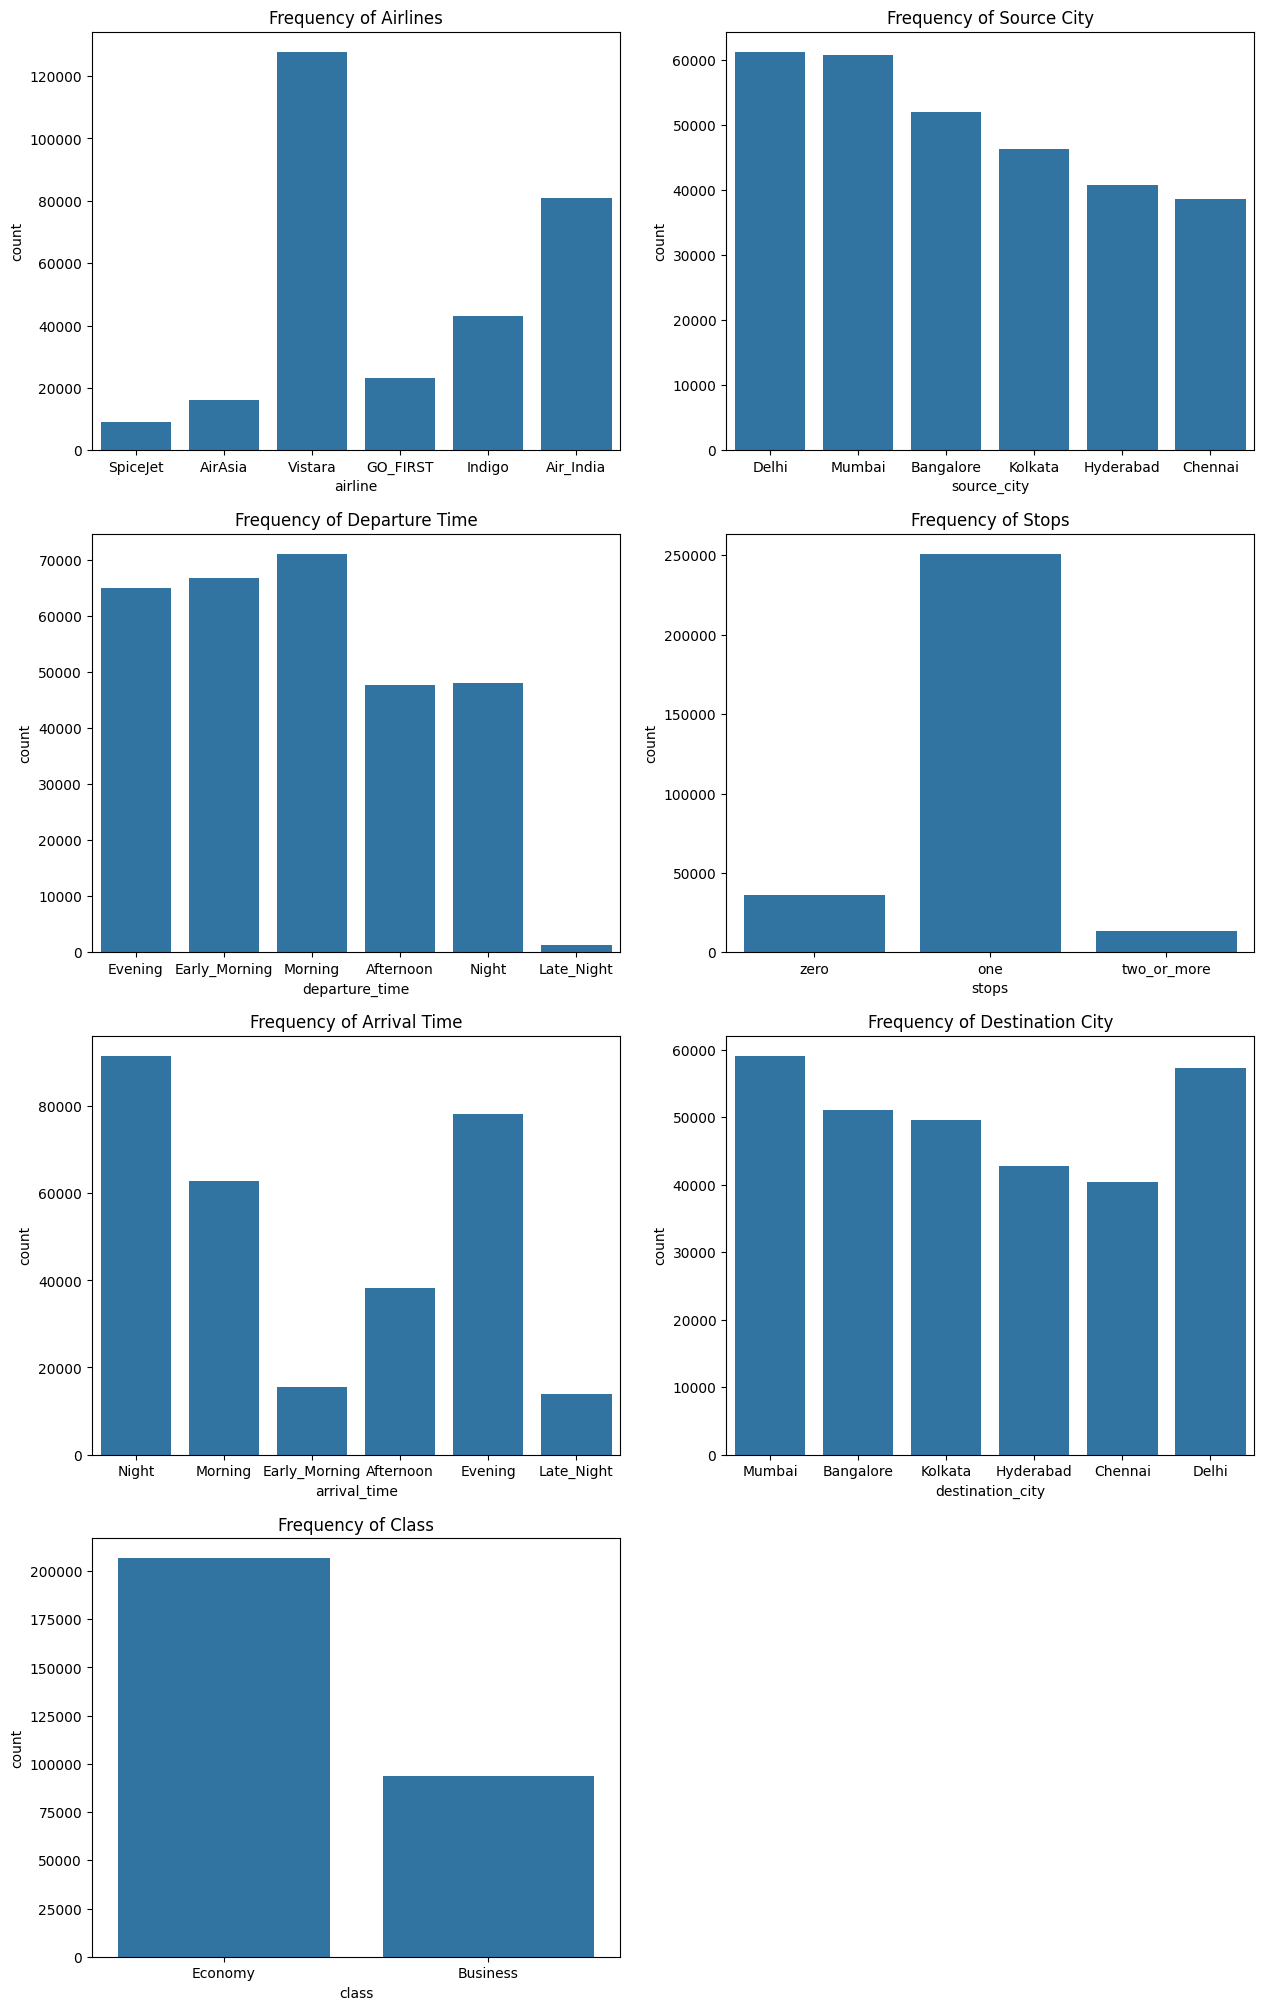

Visualization of categorical features with countplot


In [10]:
plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
sns.countplot(x=data['airline'])
plt.title('Frequency of Airlines')

plt.subplot(4,2,2)
sns.countplot(x=data['source_city'])
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=data['departure_time'])
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=data['stops'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=data['arrival_time'])
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=data['destination_city'])
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=data['class'])
plt.title('Frequency of Class')

plt.show()
print('Visualization of categorical features with countplot')


In [11]:
# Performing One Hot Encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

column_to_encode = ['airline','source_city','stops','departure_time','arrival_time','destination_city','class']
for columns in column_to_encode:
  data[columns] = le.fit_transform(data[columns])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


<ipython-input-13-5b20b5227b08>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


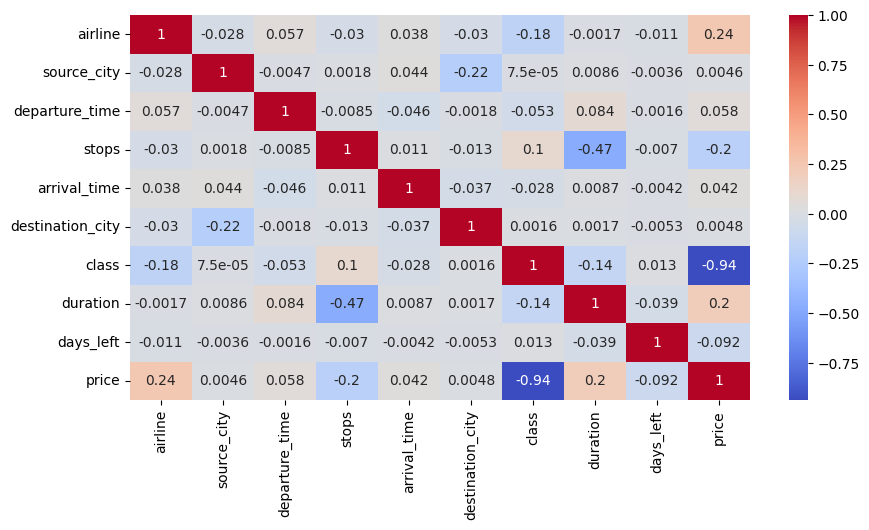

Plotting correlation graph to see correlation between features and dependent variable


In [13]:
# feature selection
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()
print('Plotting correlation graph to see correlation between features and dependent variable')

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
  if ((data[col].dtype != 'object')&(col != 'price')):
    col_list.append(col)

X=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [15]:
data['flight'] = le.fit_transform(data['flight'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [16]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight

X = data.drop(columns=['price'])
y = data['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_Value'])
difference

,Actual_value,Predicted_Value
0,10721.0,13015.140459
1,66928.0,51424.032971
2,6909.0,311.475901
3,2271.0,-2922.828632
4,4363.0,5959.206427
...,...,...
60026,6461.0,7727.488210
60027,49207.0,57147.211808
60028,20291.0,8659.126950
60029,18281.0,8650.706786


In [17]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.905241039190388

In [18]:
# Calculating mean absolute error(MAE)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
# Calculating  Mean absolute percentage error(MAPE)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.4384421475673834

In [19]:
# Calculating mean square error(MSE)
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

48452005.53536006

In [20]:
# Calculating  Root Mean square error(RMSE)
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

6960.747483953147

<ipython-input-21-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-21-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


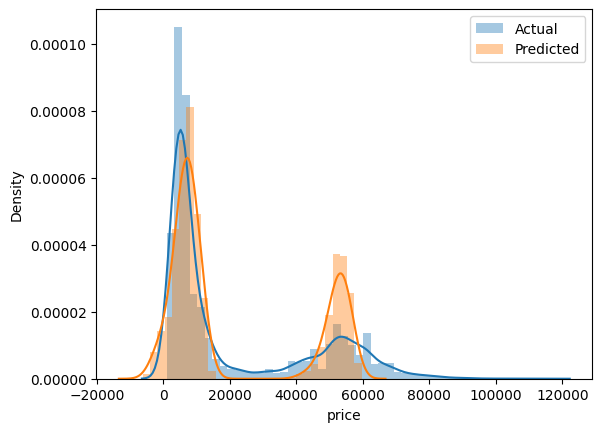

In [21]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

In [22]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.9840415359364966

In [23]:
# Calculating  MAE and MAPE of Decision Tree Regressor
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
mean_absolute_percentage_error(y_test,y_pred)

0.059328928798409515

In [24]:
# Calculating  MSE and RMSE of Decision Tree Regressor
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2856.5463772575145

<ipython-input-25-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-25-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


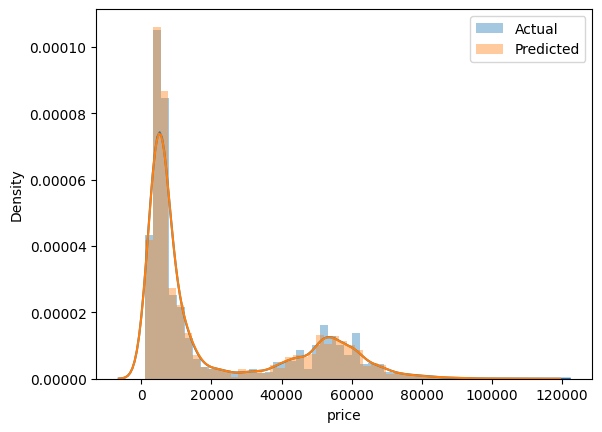

In [25]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

In [26]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9900155385816134

In [27]:
# Calculating  MAE and MAPE of Random Forest Regressor
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
mean_absolute_percentage_error(y_test,y_pred)

0.057904653716340126

In [28]:
# Calculating  MSE and RMSE of Random Forest Regressor
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2259.4776822651656

<ipython-input-29-322d9056a76f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-29-322d9056a76f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


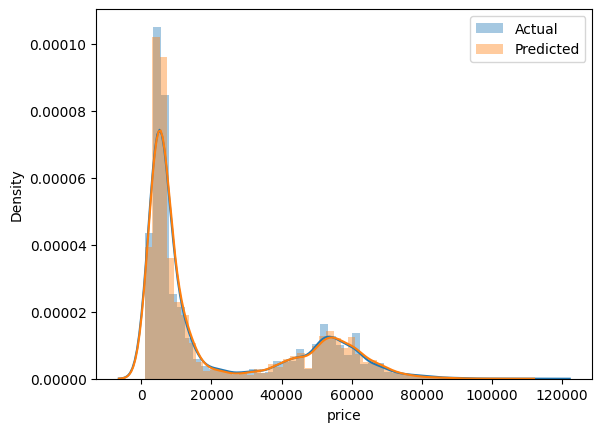

In [29]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()